In [ ]:
# import pandas as pd

# a = ['Source.IP', 'Source.Port', 'Destination.IP','Destination.Port', 'Protocol',
#          'Flow.Duration','Total.Fwd.Packets', 'Total.Backward.Packets', 'SYN.Flag.Count',
#          'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Flow.Bytes.s','Flow.Packets.s',
#          'Min.Packet.Length', 'Max.Packet.Length', 'FIN.Flag.Count','SYN.Flag.Count', 'Average.Packet.Size', 'ProtocolName']

# dfa = pd.DataFrame(a)
# dfa

'''
'Destination.IP', 'Destination.Port', 'Source.IP', 'Init_Win_bytes_forward',
 'min_seg_size_forward', 'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max',
 'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std', 'Bwd.IAT.Total',
 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s', 'Fwd.IAT.Total', 'Fwd.IAT.Max',
 'Fwd.Packet.Length.Mean', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length',
 'Total.Length.of.Fwd.Packets', 'Bwd.IAT.Max', 'Packet.Length.Variance', 'Bwd.Packets.s',
 'Flow.IAT.Mean', 'Fwd.Header.Length', 'act_data_pkt_fwd', 'Max.Packet.Length',
 'Flow.Packets.s', 'Flow.IAT.Std', 'Packet.Length.Std', 'Idle.Max',
 'Fwd.Header.Length.1', 'Bwd.Packet.Length.Mean', 'Bwd.IAT.Std', 'Fwd.Packet.Length.Min',
 'Bwd.Packet.Length.Std', 'Avg.Bwd.Segment.Size', 'Average.Packet.Size', 'Total.Length.of.Bwd.Packets',
 'Packet.Length.Mean', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Flow.IAT.Min',
 'Bwd.IAT.Mean', 'Bwd.Packet.Length.Max', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets',
 'Total.Backward.Packets', 'Bwd.Header.Length', 'Subflow.Bwd.Bytes', 'Subflow.Bwd.Packets', 
 'Idle.Mean', 'Fwd.IAT.Min', 'Down.Up.Ratio', 'Idle.Min'

'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Advance Computer Network/Dataset/Unicauca_train_V2.csv")
df.head()

,Unnamed: 0,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,376314,10.200.7.5,3128,192.168.10.65,50947,6,308,1,1,6,6.0,6,6,6.000000,0.00000,6,6,6.00,0.000000,38961.038961,6493.506494,308.000000,0.000000e+00,308.0,308,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,20,20,3246.753247,3246.753247,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,1,9.000000,6.000000,6.00,20,1,6,1,6,401,16071,0,20,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7,HTTP based
1,384302,10.200.7.8,3128,172.19.1.45,51234,6,66,2,0,0,0.0,0,0,0.000000,0.00000,0,0,0.00,0.000000,0.000000,30303.030303,66.000000,0.000000e+00,66.0,66,66.0,66.0,0.000000e+00,66.0,66.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,64,0,30303.030303,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,0.000000,0.000000,0.00,64,2,0,0,0,486,-1,0,32,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7,HTTP based
2,389797,10.200.7.8,3128,192.168.32.3,54472,6,168,1,2,0,0.0,0,0,0.000000,0.00000,0,0,0.00,0.000000,0.000000,17857.142857,84.000000,1.173797e+02,167.0,1,0.0,0.0,0.000000e+00,0.0,0.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0,32,64,5952.380952,11904.761905,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,2,0.000000,0.000000,0.00,32,1,0,2,0,520,4116,0,32,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7,HTTP based
3,61985,10.200.7.6,3128,192.168.42.28,51388,6,375,2,0,12,0.0,6,6,6.000000,0.00000,0,0,0.00,0.000000,32000.000000,5333.333333,375.000000,0.000000e+00,375.0,375,375.0,375.0,0.000000e+00,375.0,375.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,40,0,5333.333333,0.000000,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,9.000000,6.000000,0.00,40,2,12,0,0,346,-1,1,20,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7,HTTP based
4,115348,192.168.10.103,62800,10.200.7.9,3128,6,60972534,13,50,3330,3402.0,1289,6,256.153846,470.26426,1517,6,68.04,213.868352,110.410369,1.033252,983427.967742,5.827463e+06,45009407.0,0,60972084.0,5081007.0,1.286914e+07,45009675.0,7.0,60972447.0,1.244336e+06,7.367924e+06,51120651.0,0.0,1,260,1000,0.213211,0.820041,6,1517,124.609375,321.967642,103663.16245,0,1,0,0,1,0,0,3,126.587302,256.153846,68.04,260,13,3330,50,3402,62,790,12,20,604925.5,392855.092598,882716.0,327135.0,19781802.0,2.187329e+07,45009407.0,6111238.0,131,HTTP based


In [4]:
df.shape

(15000, 75)

In [5]:
df['ProtocolName'].unique()
print(df['ProtocolName'].nunique())

15


In [6]:
pd.set_option("display.max_rows", None)
df['ProtocolName'].value_counts()

GOOGLE            1000
GMAIL             1000
MSN               1000
SKYPE             1000
TWITTER           1000
CLOUDFLARE        1000
WINDOWS_UPDATE    1000
AMAZON            1000
HTTP based        1000
DROPBOX           1000
YAHOO             1000
APPLE             1000
YOUTUBE           1000
MICROSOFT         1000
FACEBOOK          1000
Name: ProtocolName, dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count'

# Feature Selection 

In [8]:
df = df.dropna()
df = df[['Destination.IP', 'Destination.Port', 'Source.IP', 'Init_Win_bytes_forward', 'min_seg_size_forward', 'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max', 'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std', 'Bwd.IAT.Total', 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s', 'Fwd.IAT.Total', 'Fwd.IAT.Max', 'Fwd.Packet.Length.Mean', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length', 'Total.Length.of.Fwd.Packets', 'Bwd.IAT.Max', 'Packet.Length.Variance', 'Bwd.Packets.s', 'Flow.IAT.Mean', 'Fwd.Header.Length', 'act_data_pkt_fwd', 'Max.Packet.Length', 'Flow.Packets.s', 'Flow.IAT.Std', 'Packet.Length.Std', 'Idle.Max', 'Fwd.Header.Length.1', 'Bwd.Packet.Length.Mean', 'Bwd.IAT.Std', 'Fwd.Packet.Length.Min', 'Bwd.Packet.Length.Std', 'Avg.Bwd.Segment.Size', 'Average.Packet.Size', 'Total.Length.of.Bwd.Packets', 'Packet.Length.Mean', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Flow.IAT.Min', 'Bwd.IAT.Mean', 'Bwd.Packet.Length.Max', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Bwd.Header.Length', 'Subflow.Bwd.Bytes', 'Subflow.Bwd.Packets','Idle.Mean', 'Fwd.IAT.Min', 'Down.Up.Ratio', 'Idle.Min', 'ProtocolName']]

In [9]:
df.shape

(15000, 57)

In [10]:
# protocolbased = ['SOCKS','MAIL_IMAPS', 'SSL', 'SSL_NO_CERT','RADIUS', 'OPENVPN', 'SNMP', 'IP_OSPF','BGP','FTP_CONTROL', 'NTP', 'SSH', 'FTP_DATA', 'DNS', 'IP_ICMP','SSL', 'NFS', 'RTMP']
# #relabel http  ['HTTP','HTTP_PROXY', 'HTTP_CONNECT',  'HTTP_DOWNLOAD'] components unders browsing
# #relabel APPLE components  APPLE_ITUNES, APPLE_ICLOUD, APPLE 
# http = ['HTTP','HTTP_PROXY', 'HTTP_CONNECT',  'HTTP_DOWNLOAD']
# def appsrelabel(x):
#     if(http.count(x)):
#         return 'HTTP based'
#     else:
#         return x
# df['ProtocolName'] = df['ProtocolName'].apply(lambda x: appsrelabel(x))
# df = df[~df['ProtocolName'].isin(protocolbased)]

In [11]:
# chart = sns.countplot(data = df, x='ProtocolName')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
# plt.show()

In [12]:
df.columns

Index(['Destination.IP', 'Destination.Port', 'Source.IP',
       'Init_Win_bytes_forward', 'min_seg_size_forward',
       'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max',
       'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std',
       'Bwd.IAT.Total', 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s',
       'Fwd.IAT.Total', 'Fwd.IAT.Max', 'Fwd.Packet.Length.Mean',
       'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length',
       'Total.Length.of.Fwd.Packets', 'Bwd.IAT.Max', 'Packet.Length.Variance',
       'Bwd.Packets.s', 'Flow.IAT.Mean', 'Fwd.Header.Length',
       'act_data_pkt_fwd', 'Max.Packet.Length', 'Flow.Packets.s',
       'Flow.IAT.Std', 'Packet.Length.Std', 'Idle.Max', 'Fwd.Header.Length.1',
       'Bwd.Packet.Length.Mean', 'Bwd.IAT.Std', 'Fwd.Packet.Length.Min',
       'Bwd.Packet.Length.Std', 'Avg.Bwd.Segment.Size', 'Average.Packet.Size',
       'Total.Length.of.Bwd.Packets', 'Packet.Length.Mean', 'Fwd.IAT.Mean',
       'Fwd.IAT.Std', 'Flow.IAT.Min',

In [13]:
df['ProtocolName'].unique()
print(df['ProtocolName'].nunique())

15


In [14]:
pd.set_option("display.max_rows", None)
df['ProtocolName'].value_counts()

GOOGLE            1000
GMAIL             1000
MSN               1000
SKYPE             1000
TWITTER           1000
CLOUDFLARE        1000
WINDOWS_UPDATE    1000
AMAZON            1000
HTTP based        1000
DROPBOX           1000
YAHOO             1000
APPLE             1000
YOUTUBE           1000
MICROSOFT         1000
FACEBOOK          1000
Name: ProtocolName, dtype: int64

In [15]:
df_feature = df.copy()
df_feature = df_feature.drop(columns =["ProtocolName"], axis = 1)
df_target = df['ProtocolName']

# Classification

#### Preprocessing

In [16]:
df_feature = df.copy()
df_feature = df_feature.drop(columns =["ProtocolName"], axis = 1)
df_target = df['ProtocolName']

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [18]:
df_feature['Source.IP']= LabelEncoder().fit_transform(df_feature['Source.IP'])
df_feature['Destination.IP']= LabelEncoder().fit_transform(df_feature['Destination.IP'])

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(df_feature)
y = df_target

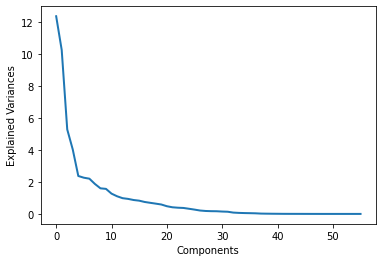

In [20]:
from matplotlib.pyplot import plot, xlabel, ylabel

pca2 = PCA().fit(X)
plt.plot(pca2.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

In [21]:
pca = PCA(n_components=40)
# pca.fit(X)

principalComponents = pca.fit_transform(X)
# principalDf = pd.DataFrame(data = principalComponents)

In [22]:
# principalDf.head()

In [23]:
# finalDf = pd.concat([principalDf, y], axis = 1)
# finalDf.head()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.25)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_pred = rf.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

        AMAZON       0.71      0.76      0.74       239
         APPLE       0.76      0.85      0.80       253
    CLOUDFLARE       0.90      0.90      0.90       250
       DROPBOX       0.87      0.88      0.87       253
      FACEBOOK       0.93      0.85      0.89       266
         GMAIL       0.58      0.59      0.58       282
        GOOGLE       0.39      0.40      0.39       218
    HTTP based       0.72      0.55      0.62       244
     MICROSOFT       0.54      0.50      0.52       243
           MSN       0.72      0.74      0.73       258
         SKYPE       0.59      0.60      0.60       268
       TWITTER       0.63      0.59      0.61       231
WINDOWS_UPDATE       0.82      0.87      0.84       242
         YAHOO       0.69      0.76      0.72       269
       YOUTUBE       0.56      0.56      0.56       234

      accuracy                           0.70      3750
     macro avg       0.69      0.69      0.69 

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

sgb = GradientBoostingClassifier()
sgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [29]:
y_pred_sgb = sgb.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred_sgb))

                precision    recall  f1-score   support

        AMAZON       0.65      0.72      0.68       239
         APPLE       0.66      0.77      0.71       253
    CLOUDFLARE       0.83      0.88      0.85       250
       DROPBOX       0.89      0.83      0.86       253
      FACEBOOK       0.85      0.80      0.82       266
         GMAIL       0.56      0.51      0.53       282
        GOOGLE       0.38      0.39      0.38       218
    HTTP based       0.64      0.51      0.57       244
     MICROSOFT       0.47      0.49      0.48       243
           MSN       0.57      0.61      0.59       258
         SKYPE       0.52      0.42      0.46       268
       TWITTER       0.48      0.45      0.47       231
WINDOWS_UPDATE       0.76      0.81      0.79       242
         YAHOO       0.67      0.74      0.70       269
       YOUTUBE       0.45      0.48      0.47       234

      accuracy                           0.63      3750
     macro avg       0.63      0.63      0.62 

In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [32]:
y_pred_xgb = xgb.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred_xgb))

                precision    recall  f1-score   support

        AMAZON       0.63      0.72      0.67       239
         APPLE       0.60      0.70      0.65       253
    CLOUDFLARE       0.77      0.88      0.82       250
       DROPBOX       0.87      0.81      0.84       253
      FACEBOOK       0.76      0.79      0.77       266
         GMAIL       0.52      0.52      0.52       282
        GOOGLE       0.37      0.39      0.38       218
    HTTP based       0.63      0.51      0.57       244
     MICROSOFT       0.43      0.36      0.39       243
           MSN       0.51      0.53      0.52       258
         SKYPE       0.51      0.42      0.46       268
       TWITTER       0.49      0.32      0.39       231
WINDOWS_UPDATE       0.72      0.81      0.76       242
         YAHOO       0.58      0.69      0.63       269
       YOUTUBE       0.45      0.44      0.45       234

      accuracy                           0.60      3750
     macro avg       0.59      0.59      0.59 

In [34]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100), random_state=1)

mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=100, random_state=1)

In [35]:
y_pred_mlp = mlp.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred_mlp))

                precision    recall  f1-score   support

        AMAZON       0.62      0.71      0.66       239
         APPLE       0.65      0.73      0.69       253
    CLOUDFLARE       0.85      0.94      0.90       250
       DROPBOX       0.90      0.85      0.88       253
      FACEBOOK       0.77      0.83      0.80       266
         GMAIL       0.65      0.56      0.60       282
        GOOGLE       0.38      0.42      0.40       218
    HTTP based       0.65      0.53      0.58       244
     MICROSOFT       0.43      0.48      0.45       243
           MSN       0.59      0.56      0.58       258
         SKYPE       0.61      0.46      0.52       268
       TWITTER       0.50      0.48      0.49       231
WINDOWS_UPDATE       0.72      0.77      0.74       242
         YAHOO       0.68      0.71      0.69       269
       YOUTUBE       0.53      0.49      0.51       234

      accuracy                           0.64      3750
     macro avg       0.63      0.64      0.63 